41丨数据挖掘实战（3）：如何对比特币走势进行预测？
====
今天我带你用数据挖掘对比特币的走势进行预测和分析。

我们之前介绍了数据挖掘算法中的分类、聚类、回归和关联分析算法，那么对于比特币走势的预测，采用哪种方法比较好呢？

可能有些人会认为采用**回归分析**会好一些，因为预测的结果是**连续的数值类型**。实际上，数据挖掘算法还有一种叫**时间序列分析**的算法，时间序列分析模型建立了观察结果与时间变化的关系，能帮我们预测未来一段时间内的结果变化情况。

那么时间序列分析和回归分析有哪些区别呢？

首先，在选择模型前，我们需要确定结果与变量之间的关系。回归分析训练得到的是目标变量 y 与自变量 x（一个或多个）的相关性，然后通过新的自变量 x 来预测目标变量 y。而时间序列分析得到的是目标变量 y 与时间的相关性。

另外，回归分析擅长的是多变量与目标结果之间的分析，即便是单一变量，也往往与时间无关。而时间序列分析建立在时间变化的基础上，它会分析目标变量的趋势、周期、时期和不稳定因素等。这些趋势和周期都是在时间维度的基础上，我们要观察的重要特征。

那么针对今天要进行的预测比特币走势的项目，我们都需要掌握哪些目标呢？
1. 了解时间序列预测的概念，以及常用的模型算法，包括 AR、MA、ARMA、ARIMA 模型等；
2. 掌握并使用 ARMA 模型工具，对一个时间序列数据进行建模和预测；
3. 对比特币的历史数据进行时间序列建模，并预测未来 6 个月的走势。

时间序列预测
====
关于时间序列，你可以把它理解为按照时间顺序组成的数字序列。实际上在中国古代的农业社会中，人们就将一年中不同时间节点和天气的规律总结了下来，形成了二十四节气，也就是从时间序列中观察天气和太阳的规律（只是当时没有时间序列模型和相应工具），从而使得农业得到迅速发展。在现代社会，时间序列在金融、经济、商业领域拥有广泛的应用。

在时间序列预测模型中，有一些经典的模型，包括 AR、MA、ARMA、ARIMA。我来给你简单介绍一下。

### AR 的英文全称叫做 Auto Regressive，中文叫自回归模型。
这个算法的思想比较简单，它认为过去若干时刻的点通过线性组合，再加上白噪声就可以预测未来某个时刻的点。

在我们日常生活环境中就存在白噪声，在数据挖掘的过程中，你可以把它理解为一个期望为 0，方差为常数的纯随机过程。AR 模型还存在一个阶数，称为 AR（p）模型，也叫作 p 阶自回归模型。它指的是通过这个时刻点的前 p 个点，通过线性组合再加上白噪声来预测当前时刻点的值。

### MA 的英文全称叫做 Moving Average，中文叫做滑动平均模型。
它与 AR 模型大同小异，AR 模型是历史时序值的线性组合，MA 是通过历史白噪声进行线性组合来影响当前时刻点。AR 模型中的历史白噪声是通过影响历史时序值，从而间接影响到当前时刻点的预测值。同样 MA 模型也存在一个阶数，称为 MA(q) 模型，也叫作 q 阶移动平均模型。我们能看到 AR 和 MA 模型都存在阶数，在 AR 模型中，我们用 p 表示，在 MA 模型中我们用 q 表示，这两个模型大同小异，与 AR 模型不同的是 MA 模型是历史白噪声的线性组合。

### ARMA 的英文全称是 Auto Regressive Moving Average
中文叫做**自回归滑动平均模型**，也就是 AR 模型和 MA 模型的混合。相比 AR 模型和 MA 模型，它有更准确的估计。同样 ARMA 模型存在 p 和 q 两个阶数，称为 ARMA(p,q) 模型。

### ARMA 模型工具
上面介绍的 AR，MA，ARMA，ARIMA 四种模型，你只需要了解基础概念即可，中间涉及到的一些数学公式这里不进行展开。

在实际工作中，我们更多的是使用工具，我在这里主要讲解下如何使用 ARMA 模型工具。

在使用 ARMA 工具前，你需要先引用相关工具包：
```python
from statsmodels.tsa.arima_model import ARMA
```
然后通过 ARMA(endog,order,exog=None) 创建 ARMA 类，这里有一些主要的参数简单说明下：
1. endog：英文是 endogenous variable，代表内生变量，又叫非政策性变量，它是由模型决定的，不被政策左右，可以说是我们想要分析的变量，或者说是我们这次项目中需要用到的变量。
2. order：代表是 p 和 q 的值，也就是 ARMA 中的阶数。
3. exog：英文是 exogenous variables，代表外生变量。外生变量和内生变量一样是经济模型中的两个重要变量。相对于内生变量而言，外生变量又称作为政策性变量，在经济机制内受外部因素的影响，不是我们模型要研究的变量。

举个例子，如果我们想要创建 ARMA(7,0) 模型，可以写成：ARMA(data,(7,0))，其中 data 是我们想要观察的变量，(7,0) 代表 (p,q) 的阶数。

创建好之后，我们可以通过 fit 函数进行拟合，通过 predict(start, end) 函数进行预测，其中 start 为预测的起始时间，end 为预测的终止时间。

下面我们使用 ARMA 模型对一组时间序列做建模，代码如下：
```python
# coding:utf-8
# 用ARMA进行时间序列预测
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
# 创建数据
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]
data=pd.Series(data)
data_index = sm.tsa.datetools.dates_from_range('1901','1990')
# 绘制数据图
data.index = pd.Index(data_index)
data.plot(figsize=(12,8))
plt.show()
# 创建ARMA模型# 创建ARMA模型
arma = ARMA(data,(7,0)).fit()
print('AIC: %0.4lf' %arma.aic)
# 模型预测
predict_y = arma.predict('1990', '2000')
# 预测结果绘制
fig, ax = plt.subplots(figsize=(12, 8))
ax = data.ix['1901':].plot(ax=ax)
predict_y.plot(ax=ax)
plt.show()
```
我创建了 1901 年 -1990 年之间的时间序列数据 data，然后创建 ARMA(7,0) 模型，并传入时间序列数据 data，使用 fit 函数拟合，然后对 1990 年 -2000 年之间的数据进行预测，最后绘制预测结果。

你能看到 ARMA 工具的使用还是很方便的，只是我们需要 p 和 q 的取值。实际项目中，我们可以给 p 和 q 指定一个范围，让 ARMA 都运行一下，然后选择最适合的模型。

你可能会问，怎么判断一个模型是否适合？

我们需要引入 AIC 准则，也叫作**赤池消息准则**，它是衡量统计模型拟合好坏的一个标准，数值越小代表模型拟合得越好。

在这个例子中，你能看到 ARMA(7,0) 这个模型拟合出来的 AIC 是 1619.6323（并不一定是最优）。

对比特币走势进行预测
====
我们都知道比特币的走势除了和历史数据以外，还和很多外界因素相关，比如用户的关注度，各国的政策，币圈之间是否打架等等。当然这些外界的因素不是我们这节课需要考虑的对象。

假设我们只考虑比特币以往的历史数据，用 ARMA 这个时间序列模型预测比特币的走势。

比特币历史数据（从 2012-01-01 到 2018-10-31）可以从 GitHub 上下载：https://github.com/cystanford/bitcoin。

你能看到数据一共包括了 8 个字段，代表的含义如下：
<img src="./images/41-01.png">
我们的目标是构造 ARMA 时间序列模型，预测比特币（平均）价格走势。p 和 q 参数具体选择多少呢？我们可以设置一个区间范围，然后选择 AIC 最低的 ARMA 模型。

我们梳理下整个项目的流程：
<img src="./images/41-02.jpg">
首先我们需要加载数据。

在准备阶段，我们需要先探索数据，采用数据可视化方式查看比特币的历史走势。按照不同的时间尺度（天，月，季度，年）可以将数据压缩，得到不同尺度的数据，然后做可视化呈现。这 4 个时间尺度上，我们选择月作为预测模型的时间尺度，相应的，我们选择 Weighted_Price 这个字段的数值作为观察结果，在原始数据中，Weighted_Price 对应的是比特币每天的平均价格，当我们以“月”为单位进行压缩的时候，对应的 Weighted_Price 得到的就是当月的比特币平均价格。压缩代码如下：
```python
df_month = df.resample('M').mean()
```
最后在预测阶段创建 ARMA 时间序列模型。我们并不知道 p 和 q 取什么值时，模型最优，因此我们可以给它们设置一个区间范围，比如都是 range(0,3)，然后计算不同模型的 AIC 数值，选择最小的 AIC 数值对应的那个 ARMA 模型。最后用这个最优的 ARMA 模型预测未来 8 个月的比特币平均价格走势，并将结果做可视化呈现。

基于这个流程，具体代码如下：
```python
# -*- coding: utf-8 -*-
# 比特币走势预测，使用时间序列ARMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
# 数据加载
df = pd.read_csv('./bitcoin_2012-01-01_to_2018-10-31.csv')
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
# 数据探索
print(df.head())
# 按照月，季度，年来统计
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()
# 按照天，月，季度，年来显示比特币的走势
fig = plt.figure(figsize=[15, 7])
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.suptitle('比特币金额（美金）', fontsize=20)
plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='按天')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='按月')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='按季度')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='按年')
plt.legend()
plt.show()
# 设置参数范围
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_month.Weighted_Price,order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('最优模型: ', best_model.summary())
# 比特币预测
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31), datetime(2019, 2, 28), datetime(2019, 3, 31), 
             datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=91)
# 比特币预测结果显示
plt.figure(figsize=(20,7))
df_month2.Weighted_Price.plot(label='实际金额')
df_month2.forecast.plot(color='r', ls='--', label='预测金额')
plt.legend()
plt.title('比特币金额（月）')
plt.xlabel('时间')
plt.ylabel('美金')
plt.show()
```

我们通过 product 函数创建了 (p,q) 在 range(0,3) 范围内的所有可能组合，并对每个 ARMA(p,q) 模型进行了 AIC 数值计算，保存了 AIC 数值最小的模型参数。然后用这个模型对比特币的未来 8 个月进行了预测。

从结果中你能看到，在 2018 年 10 月之后 8 个月的时间里，比特币会触底到 4000 美金左右，实际上比特币在这个阶段确实降低到了 4000 元美金甚至更低。在时间尺度的选择上，我们选择了月，这样就对数据进行了降维，也节约了 ARMA 的模型训练时间。你能看到比特币金额（美金）这张图中，按月划分的比特币走势和按天划分的比特币走势差别不大，在减少了局部的波动的同时也能体现出比特币的趋势，这样就节约了 ARMA 的模型训练时间。

总结
====
今天我给你讲了一个比特币趋势预测的实战项目。通过这个项目你应该能体会到，当我们对一个数值进行预测的时候，如果考虑的是多个变量和结果之间的关系，可以采用回归分析，如果考虑单个时间维度与结果的关系，可以使用时间序列分析。

根据比特币的历史数据，我们使用 ARMA 模型对比特币未来 8 个月的走势进行了预测，并对结果进行了可视化显示。你能看到 ARMA 工具还是很好用的，虽然比特币的走势受很多外在因素影响，比如政策环境。不过当我们掌握了这些历史数据，也不妨用时间序列模型来分析预测一下。
<img src="./images/41-03.png">

最后依然是思考题环节，今天我们讲了 AR、MA、ARMA 和 ARIMA，你能简单说说它们之间的区别么？

另外我在GitHub中上传了沪市指数的历史数据（对应的 shanghai_1990-12-19_to_2019-2-28.csv），请你编写代码使用 ARMA 模型对沪市指数未来 10 个月（截止到 2019 年 12 月 31 日）的变化进行预测（将数据转化为按月统计即可）。



findfont: Font family ['AR PL UMing CN'] not found. Falling back to DejaVu Sans.


            Timestamp      Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                                     
2011-12-31 2011-12-31  4.465000  4.482500  4.465000  4.482500     23.829470   
2012-01-01 2012-01-01  4.806667  4.806667  4.806667  4.806667      7.200667   
2012-01-02 2012-01-02  5.000000  5.000000  5.000000  5.000000     19.048000   
2012-01-03 2012-01-03  5.252500  5.252500  5.252500  5.252500     11.004660   
2012-01-04 2012-01-04  5.200000  5.223333  5.200000  5.223333     11.914807   

            Volume_(Currency)  Weighted_Price  
Timestamp                                      
2011-12-31         106.330084        4.471603  
2012-01-01          35.259720        4.806667  
2012-01-02          95.240000        5.000000  
2012-01-03          58.100651        5.252500  
2012-01-04          63.119577        5.208159  


findfont: Font family ['AR PL UMing CN'] not found. Falling back to DejaVu Sans.


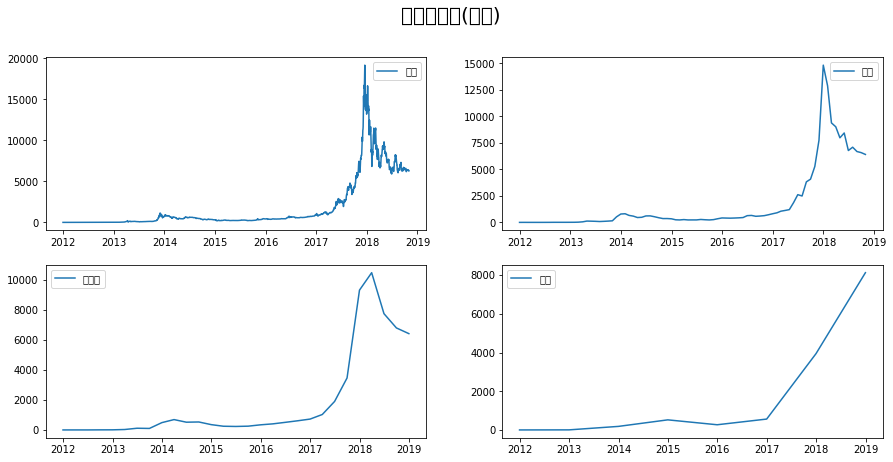

参数错误: (0, 2)


findfont: Font family ['AR PL UMing CN'] not found. Falling back to DejaVu Sans.


最优模型:                                ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                     ARMA(1, 1)   Log Likelihood                -688.761
Method:                       css-mle   S.D. of innovations            957.766
Date:                Thu, 18 Feb 2021   AIC                           1385.522
Time:                        14:33:00   BIC                           1395.198
Sample:                    12-31-2011   HQIC                          1389.409
                         - 10-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2092.3149   1566.107      1.336      0.182    -977.198    5161.828
ar.L1.Weighted_Price     0.9251      0.042     22.045      0.000       0.843       1.007
ma.L1

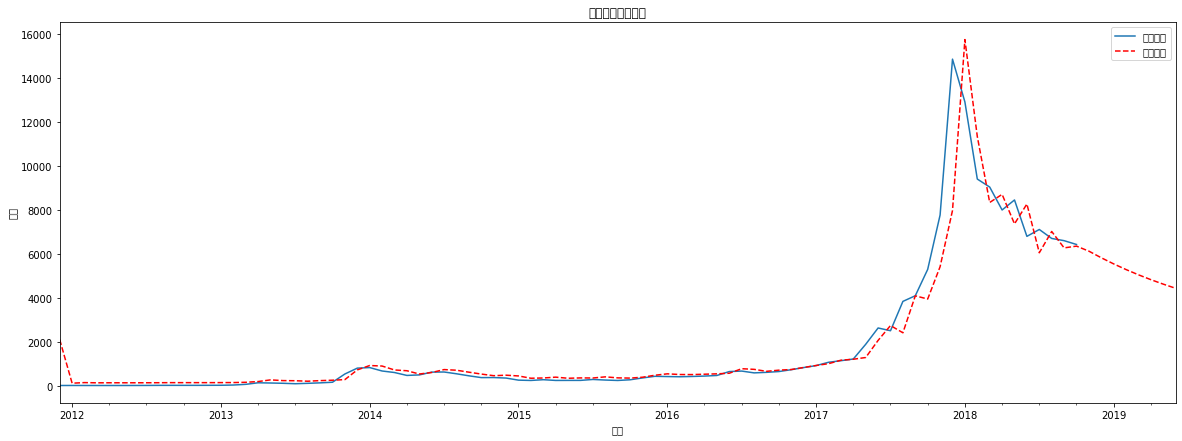

In [10]:

# -*- coding: utf-8 -*-
# 比特币走势预测，使用时间序列ARMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
# 数据加载
df = pd.read_csv('./bitcoin-master/bitcoin_2012-01-01_to_2018-10-31.csv')
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
# 数据探索
print(df.head())
# 按照月，季度，年来统计
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()
# 按照天，月，季度，年来显示比特币的走势
fig = plt.figure(figsize=[15, 7])
plt.rcParams['font.sans-serif']=['SimSun'] #用来正常显示中文标签
plt.suptitle('比特幣金額(美金)', fontsize=20)
plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='按天')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='按月')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='按季度')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='按年')
plt.legend()
plt.show()
# 设置参数范围
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_month.Weighted_Price,order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('最优模型: ', best_model.summary())
# 比特币预测
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31), datetime(2019, 2, 28), datetime(2019, 3, 31), 
             datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=91)
# 比特币预测结果显示
plt.figure(figsize=(20,7))
df_month2.Weighted_Price.plot(label='实际金额')
df_month2.forecast.plot(color='r', ls='--', label='预测金额')
plt.legend()
plt.title('比特币金额（月）')
plt.xlabel('时间')
plt.ylabel('美金')
plt.show()

In [2]:
!pip install statsmodels

     |████████████████████████████████| 9.5 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 7.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/yuyu/PythonProject/venv/bin/python -m pip install --upgrade pip' command.
